# Spanish Senorimotor Norms: Visual, Haptic, and Visuohaptic

> The Lacaster Sensorimotor Norms by Lyott and Conell (2020) is a growing database that measures the self-reported embodiment of around 40,000 Enlgish words. In this study we aim to see if the values of visual, haptic, and visuohaptic are statistically different from the one meseaured in anglosaxon communities. We expect there to be a difference becuae in different environements there are going to be different ways in which the lanuage adapts around it. This is why were are the first to measure Senorimotor norms in Spanish.
> 
> Lynott and Connell (2020) use 11 dimentions to measure embodiment
* 5 action effectors (mouth/throat, hand/arm, foot/leg, head excluding mouth/throat, and torso)
* 6 perceptual modalities (touch, hearing, smell, taste, vision, and interoception
> In order to create a detail oriented and ethical study, we ahve dicided to focus on only the perceptual modalities: visual, haptic, and our own combined catagory, visuohaptic.

#### The steps we take are the following:
1. load the libraries and databases
2. assign the means of each perceptual modality to a column name
3. sort the words from highest to lowest in visual and haptic mean seperatly
4. create masks for visual and haptic words seperatly
5. sample 300 visual words and 300 haptic words with medium variance
6. combine the 600 masked words into a seperat column called 'mixed'
7. create the visuohaptic words within the column 'mixed' called 'combined'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns #loading the dataset

#### Loads the batabase *Sensorimotor_norms_29Jan2024.csv*

**Lacaster_norms** returns all the data from the Lancaster Sensorimotor Norm data from Lynott and Connell (2020)

In [8]:
#loading the dataset
file="Sensorimotor_norms_29Jan2024.csv"
Lancaster_norms = pd.read_csv(file, sep=",")
Lancaster_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,Foot_leg.mean,Hand_arm.mean,Head.mean,...,Max_strength.sensorimotor,Exclusivity.sensorimotor,Dominant.sensorimotor,Minkowski3.perceptual,Minkowski3.action,Minkowski3.sensorimotor,N_known.perceptual,Percent_known.perceptual,N_known.action,Percent_known.action
0,A,2.214,0.000,0.429,0.000,0.000,2.429,0.000,0.357,1.071,...,2.429,0.354,Visual,2.934,1.097,2.984,14,0.737,14,0.667
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,0.381,0.429,2.714,...,4.333,0.285,Auditory,4.421,4.167,5.415,18,0.947,21,1.000
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,0.176,0.706,2.235,...,4.125,0.326,Visual,4.325,2.259,4.521,16,0.889,17,0.850
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,0.000,0.000,3.273,...,3.273,0.339,Head,3.007,3.274,3.964,17,0.850,11,0.579
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,0.000,2.474,2.632,...,3.944,0.263,Visual,4.887,3.219,5.314,18,0.947,19,0.905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,1.263,1.474,2.632,...,3.800,0.289,Visual,3.840,2.914,4.333,20,1.000,19,1.000
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,0.300,1.650,3.150,...,3.789,0.349,Visual,3.793,3.296,4.488,19,1.000,20,1.000
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,0.053,1.789,3.421,...,3.444,0.310,Visual,3.488,3.578,4.452,18,1.000,19,1.000
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,0.800,0.800,2.267,...,3.071,0.186,Visual,3.955,2.392,4.227,14,0.778,15,0.750


> The value of these words are an average from a Linkert scale that the participants used to self report there daily relationship the words using the 11 dimentions during the orginal survey

> 0 being the least prominant and 5 being the most 

#### Returns the newly assigned dataframe _sensory_dimentions_norms_ 

In [9]:
#selecting columns
column=["Word","Auditory.mean","Gustatory.mean","Haptic.mean","Interoceptive.mean","Olfactory.mean","Visual.mean"]
sensory_dimentions_norms=pd.DataFrame(Lancaster_norms,columns=column)
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
0,A,2.214,0.000,0.429,0.000,0.000,2.429
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944
...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071


#### Returns the dataframe in order of highest to lowest VISUAL ranking

In [10]:
#sorting
visual_sorted=sensory_dimentions_norms.sort_values(by= ["Visual.mean"],ascending=False)
visual_sorted

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
30856,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000
3976,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000
2394,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000
30096,SEE,0.056,0.000,0.000,0.333,0.000,5.000
26376,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000
...,...,...,...,...,...,...,...
1611,AROMA,0.158,0.474,0.000,0.421,4.895,0.053
21939,MONOXIDE,0.235,0.000,0.000,1.471,0.941,0.000
34959,TONELESSLY,3.611,0.000,0.000,0.222,0.000,0.000
1952,AUDIBILITY,4.125,0.000,0.062,0.312,0.000,0.000


#### Returns the dataframe in order of highest to lowest HAPTIC ranking

In [11]:
#sorting
haptic_sorted = sensory_dimentions_norms.sort_values(by = ["Haptic.mean"],ascending=False)
haptic_sorted

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
15458,HANDSHAKE,0.000,0.00,4.944,0.444,0.0,3.667
26413,PRICKLY,0.133,0.20,4.933,1.867,0.2,3.267
25345,PILLOW,0.529,0.00,4.882,1.529,1.0,4.706
35066,TOUCH,0.562,0.00,4.875,1.312,0.0,2.625
35072,TOUCHING,0.200,0.05,4.850,1.950,0.0,1.700
...,...,...,...,...,...,...,...
16466,HOUSEMASTER,1.357,0.00,0.000,0.286,0.0,2.929
6741,CONSCIENCE,0.579,0.00,0.000,3.684,0.0,0.158
6738,CONQUEROR,1.833,0.00,0.000,0.278,0.0,2.389
35701,TWEET,2.722,0.00,0.000,0.278,0.0,3.722


### Visual masks 
> We selected the words with the medium ranking (valued between 2-3) for both visual and haptic words.
> These words should be variant enough to be bimodally relevant  

#### returns words with a rating between 2 and 3 called *visual.mask*

In [12]:
sensory_dimentions_norms['visual.mask']= sensory_dimentions_norms['Visual.mean'][(sensory_dimentions_norms['Visual.mean']<= 3)& (sensory_dimentions_norms['Visual.mean']>=2)] 
# mask created to select the sorted visual words that have a ranting between 2 and 3  
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,visual.mask
0,A,2.214,0.000,0.429,0.000,0.000,2.429,2.429
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,NaN
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,NaN
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,2.824
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,NaN
...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,NaN
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,NaN
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,NaN
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,NaN


#### Returns words with a rating between 2 and 3 called *haptic.mask*

In [13]:
sensory_dimentions_norms['haptic.mask']= sensory_dimentions_norms['Haptic.mean'][(sensory_dimentions_norms['Haptic.mean']<= 3)& (sensory_dimentions_norms['Haptic.mean']>=2)]
# mask created to select the sorted visual words that have a ranting between 2 and 3  
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,visual.mask,haptic.mask
0,A,2.214,0.000,0.429,0.000,0.000,2.429,2.429,NaN
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,NaN,NaN
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,NaN,NaN
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,2.824,NaN
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,NaN,NaN
...,...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,NaN,NaN
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,NaN,NaN
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,NaN,NaN
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,NaN,NaN


#### Removing data that is not between 2 and 3 ranking for visual and haptic masked columns

In [14]:
sensory_dimentions_norms=sensory_dimentions_norms.dropna()

#### Creating a random seed to ensure constistant results

In [15]:
np.random.seed(8)
# fixes the starting point of randomization
# 8 becuase its my favorite number!

#### Subselecting the a random 300 masked words between (2 and 3 values)

In [16]:
visual_haptic_sample = sensory_dimentions_norms.sample(n=300)

dimensions = list(visual_haptic_sample.columns.values)
dimensions = dimensions[0:7] # 'Word' - 'Visual.mean'
visual_haptic_sample = visual_haptic_sample[dimensions]
visual_haptic_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
13240,FLUNG,0.800,0.000,2.400,0.450,0.000,2.900
28829,REWEAVE,0.133,0.000,2.067,0.067,0.067,2.600
36954,UNLOOSE,0.444,0.000,2.000,1.000,0.000,2.611
19318,KNOCKER,2.944,0.000,2.056,0.278,0.000,2.667
16681,HYMEN,0.176,0.000,2.294,1.471,0.000,2.412
...,...,...,...,...,...,...,...
19448,LANCES,0.375,0.000,2.062,0.875,0.062,3.000
3933,BREEZY,2.632,0.105,2.947,1.368,0.632,2.316
15788,HEAT PUMP,1.100,0.000,2.600,0.400,0.150,2.950
10655,EARPLUG,1.520,0.000,2.880,0.440,0.040,2.600


### Graphs 
These graphs depict the whole distribution of the values for valual and haptic independantly. The dotten line is there to indicate the highest 300 (visual) and 500 (haptic) words in the dataset.

#### Visual words and Sensorimotor Strength graph 
Returns a graph depicting all the visual words with a line indicting the 300 words with the lowest variance 

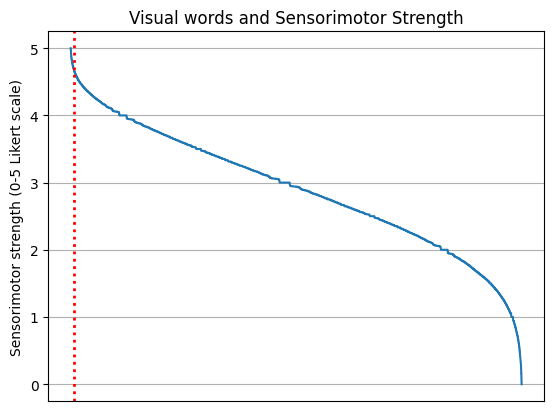

In [17]:
# defining x and y axis 
x_data = visual_sorted["Word"]
y_data = visual_sorted["Visual.mean"]

# defining the type of plot
fig, ax = plt.subplots()
ax.plot(x_data, y_data)

# names of labels 
ax.set(xlabel = 'Visual words', ylabel='Sensorimotor strength (0-5 Likert scale)',title = 'Visual words and Sensorimotor Strength')

#set x label to false becuase it tries to print all the words 
ax.get_xaxis().set_visible(False)

# show plot
ax.grid()

# add verticle line at 300
ax.axvline(x = 300, color = 'red', linestyle = 'dotted', linewidth = 2)

#fig.savefig("test.png")
plt.show()

#### Haptic words and Senorimotor Strength graph
Returns a graph depicting all the haptic words with a line indicting the 500 words with the lowest variance 

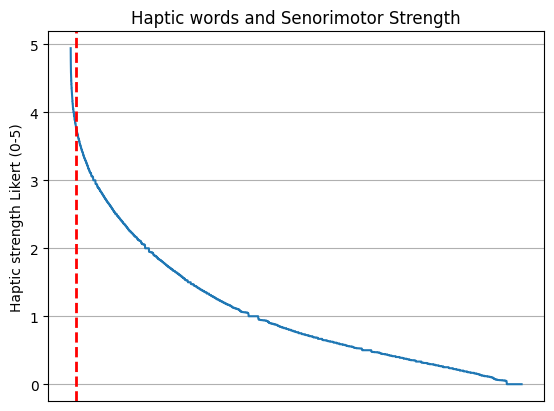

In [18]:
# defining x and y axis 
x_data = haptic_sorted["Word"]
y_data = haptic_sorted["Haptic.mean"]

#defining the type of plot
fig, ax = plt.subplots()
ax.plot(x_data, y_data)

#labling x and y axis 
ax.set(xlabel = 'Haptic Words', ylabel='Haptic strength Likert (0-5)',
       title = 'Haptic words and Senorimotor Strength')

ax.get_xaxis().set_visible(False)
ax.grid()

# add verticle line
ax.axvline(x = 500, color = 'red', linestyle = 'dotted', linewidth = 2)

plt.show()

# PROBLEM 
still can't get the axis to show up without listing ever single word its plotting

This worked for the other graphs but not when I tried to change the 2 above:
> plt.ylabel('Values from Likert Scale (0-5)')
> 
> plt.xlabel('Perceptual Modalities')



#### Indexing the top 300 (visual) and 500 (haptic) words

In [19]:
# indexing subset
visual_subset = visual_sorted.iloc[:300]
haptic_subset = haptic_sorted.iloc[:500]

#### Returning 300 haptic words that have a visual score less <= 4
*haptic_subset* creates a subset to imporove the strenth of haptic words without an extrememly high visual value. This will ensure that the visuo-haptic words have a more equal distribution between visual and haptic strengths

In [20]:
haptic_subset = haptic_subset[haptic_subset['Visual.mean'] <= 4]
haptic_subset = haptic_subset.iloc[:300]

#### Returning *visual* or *haptic* in a new *mixed* column
**combined_visual_haptic_df** column combines the visual and the haptic words together.

Returning a *mixed* colum with 600 highly ranked visual and highly ranked haptic words 
Returns the 600 words lebeled as *visual* or *haptic*

In [21]:
# create new dataframe for the visual subset
visual_subset_df = pd.DataFrame(visual_subset)
# set it to a new column called 'mixed'
visual_subset_df['mixed'] = 'visual' 

# create a new dataframe for the haptic subset
haptic_subset_df = pd.DataFrame(haptic_subset)
# set it to a new coumn called 'mixed'
haptic_subset_df['mixed'] = 'haptic'

# use the .concat function to combine the visual and haptic dataframes together to make 1 single new column
combined_visual_haptic_df = pd.concat([visual_subset_df, haptic_subset_df], ignore_index=True)
combined_visual_haptic_df

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
0,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000,visual
1,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000,visual
2,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000,visual
3,SEE,0.056,0.000,0.000,0.333,0.000,5.000,visual
4,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000,visual
...,...,...,...,...,...,...,...,...
595,DENTAL FLOSS,0.625,1.812,3.812,1.125,0.375,3.688,haptic
596,DRENCHING,1.500,0.312,3.812,0.562,0.312,3.500,haptic
597,LIFTING,0.952,0.238,3.810,3.190,0.286,3.714,haptic
598,PINCHING,0.650,0.100,3.800,2.600,0.100,2.750,haptic


#### Eliminating the repeated words 
**unique_df** removes the repeated words in the *mixed* column = 600 unique words

In [22]:
# .dropduplicates removes the repeated words in the 'mixed' column
unique_df = combined_visual_haptic_df.drop_duplicates(subset=['Word'])
unique_df 

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
0,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000,visual
1,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000,visual
2,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000,visual
3,SEE,0.056,0.000,0.000,0.333,0.000,5.000,visual
4,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000,visual
...,...,...,...,...,...,...,...,...
595,DENTAL FLOSS,0.625,1.812,3.812,1.125,0.375,3.688,haptic
596,DRENCHING,1.500,0.312,3.812,0.562,0.312,3.500,haptic
597,LIFTING,0.952,0.238,3.810,3.190,0.286,3.714,haptic
598,PINCHING,0.650,0.100,3.800,2.600,0.100,2.750,haptic


#### Plotting the combined dataframe *'mixed'* levels
We are plotting seperatly the words that are unquly visual and unquly haptic and camparing them to the other columns. This is so the researchers can see that the amount of word in either column have low variance compared to ther

#### Returns a plot with all the modalities **and** the uniquly visual words

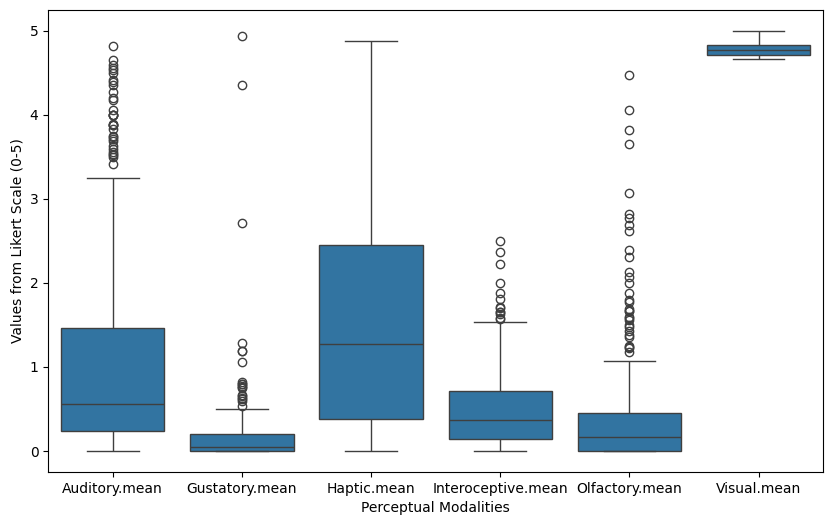

In [23]:
# set the unique visual dataframe to the mixed column
# within the mixed column find the words labeled visual
unique_df_visual = unique_df[unique_df['mixed'] == 'visual']

# define the columns we want in the plot
dimensions = list(unique_df_visual.columns.values)
dimensions = dimensions[1:7] # 'Words' - 'Visual.mean'



# set plot = the unique visual dataframe
data_to_plot = unique_df_visual[dimensions]

#resize the plot
plt.figure(figsize=(10, 6))

# label the plot
sns.boxplot(x ='variable', y = 'value', data = pd.melt(data_to_plot))
plt.ylabel('Values from Likert Scale (0-5)')
plt.xlabel('Perceptual Modalities')

plt.show()

#### Returns a plot with all the Perceptual Modalities **and** the uniquly haptic words

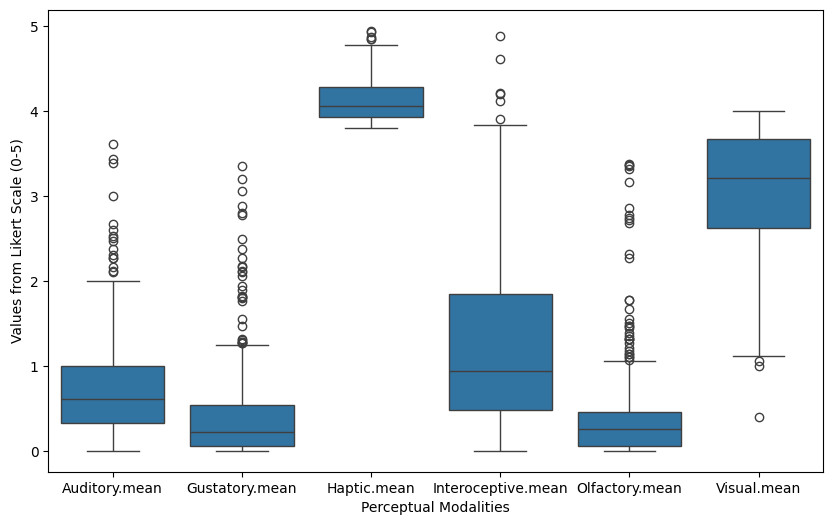

In [24]:
# set the unique haptic dataframe to the mixed column
# within the mixed column find the words labeled 'haptic' 
unique_df_haptic = unique_df[unique_df['mixed'] == 'haptic']

## define the columns we want in the plot 
dimensions = list(unique_df_haptic.columns.values)
dimensions = dimensions[1:7] # 'Word' - 'Visual.mean'


# set plot = the unique haptic dataframe
data_to_plot = unique_df_haptic[dimensions]

#resize the plot
plt.figure(figsize=(10, 6))

# label the plot
sns.boxplot(x ='variable', y = 'value', data = pd.melt(data_to_plot))
plt.ylabel('Values from Likert Scale (0-5)')
plt.xlabel('Perceptual Modalities')

plt.show()

#### Visuohaptic words
Returns the top 200 visual + 200 haptic low variance words 

Combines them into a single catagory within the 'mixed' column called 'combined'

408 words 

In [25]:
# define the columns we want in the plot 
dimensions = list(visual_haptic_sample.columns.values)
visual_haptic_sample['mixed'] = 'combined'
visual_haptic_sample


,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
13240,FLUNG,0.800,0.000,2.400,0.450,0.000,2.900,combined
28829,REWEAVE,0.133,0.000,2.067,0.067,0.067,2.600,combined
36954,UNLOOSE,0.444,0.000,2.000,1.000,0.000,2.611,combined
19318,KNOCKER,2.944,0.000,2.056,0.278,0.000,2.667,combined
16681,HYMEN,0.176,0.000,2.294,1.471,0.000,2.412,combined
...,...,...,...,...,...,...,...,...
19448,LANCES,0.375,0.000,2.062,0.875,0.062,3.000,combined
3933,BREEZY,2.632,0.105,2.947,1.368,0.632,2.316,combined
15788,HEAT PUMP,1.100,0.000,2.600,0.400,0.150,2.950,combined
10655,EARPLUG,1.520,0.000,2.880,0.440,0.040,2.600,combined


#### Returns a plot with the visuohaptic words 

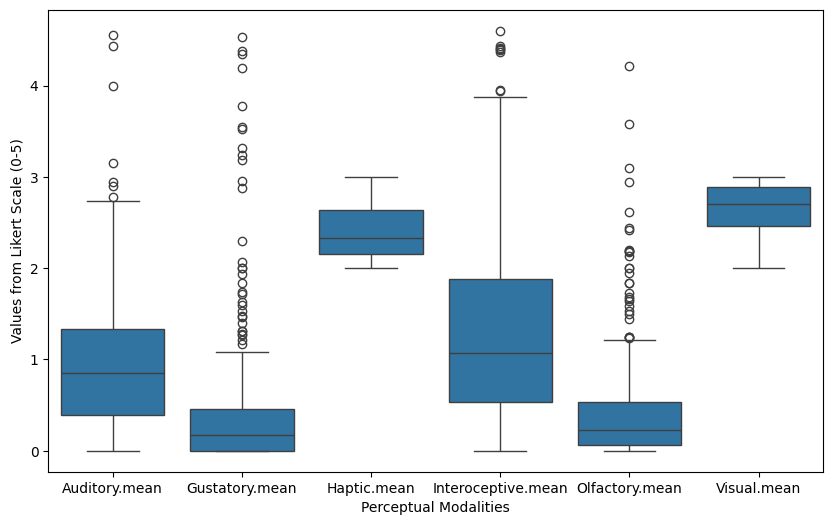

In [26]:
## define the columns we want in the plot 
dimensions = list(visual_haptic_sample.columns.values)
dimensions = dimensions[1:7] # 'Word' - 'Visual.mean'


# set plot = the unique haptic dataframe
data_to_plot = visual_haptic_sample[dimensions]

#resize the plot
plt.figure(figsize=(10, 6))

# label the plot
sns.boxplot(x ='variable', y = 'value', data = pd.melt(data_to_plot))
plt.ylabel('Values from Likert Scale (0-5)')
plt.xlabel('Perceptual Modalities')

plt.show()

# Saving file 

In [27]:
filename = 'Stimuli_master_selsction.csv'
combined_visual_haptic_df = pd.concat([combined_visual_haptic_df, visual_haptic_sample], ignore_index=True)
# Save the DataFrame to a CSV file
combined_visual_haptic_df.to_csv(filename)